# EXPLORATORY DATA ANALYSIS
Company X is expanding in to new industries to diversify its portfolio. They are particularly interested in purchasing and operating airplanes for commercial and private enterprises. However, they do not have enough knowledge on the potential risks of aircrafts.



**Task**

- Determine which aircraft are the lowest risk for the company X to start this new endeavor.
- Translate findings into actionable insights that the stake holders can use to help decide which aircraft to purchase.


## The Data
The data is from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters. The dataset was obtained from Kaggle. https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses


## Loading the Data¶

In [1]:
# import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_excel("AviationData.xlsx")
df.head()

## Exploring the Data

In [ ]:
df.info()

In [ ]:
# get the number of missing values
df.isna().sum()

## Data Cleaning

In [ ]:
relevant_columns = [
    'Investigation.Type',
    'Event.Date',
    'Country',
    'Injury.Severity',
    'Aircraft.damage',
    'Make',
    'Model',
    'Amateur.Built',
    'Number.of.Engines',
    'Engine.Type',
    'Purpose.of.flight',
    'Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured',
    'Weather.Condition',
    
]

In [ ]:
df_new = df.loc[:,relevant_columns]
df_new.shape

In [ ]:
# change some column titles to more managable ones
new_column_names = { 'Investigation.Type': 'Investigation_Type', 'Event.Date':'Event_Date', 'Injury.Severity':'Injury_Severity', 
                    'Aircraft.damage':'Aircraft_damage', 'Number.of.Engines':'Number_of_Engines', 'Purpose.of.flight':'Flight_Purpose',
                    'Total.Fatal.Injuries':'Fatal_Injuries', 'Total.Serious.Injuries':'Serious_Injuries',
                   'Total.Minor.Injuries':'Minor_Injuries', 'Total.Uninjured':'Uninjured', 'Weather.Condition':'Weather',}
df_new.rename(columns=new_column_names, inplace=True)

In [ ]:
df_new.head()

In [ ]:
df_new.info()

In [ ]:
# I subset the data to determine the Make and Model that has been involved in many Accidents
# Handling the missing data in Make and Model

df_new.Make.value_counts()

Here, we realize that Cessna and CESSNA are taken as different rows despite being the same thing. change the case to lower

In [ ]:
df_new['Make'] = df_new['Make'].str.lower()

In [ ]:
df_new['Make'].isna().sum()

In [ ]:
df_new= df_new[df_new['Make'].notna()]

In [ ]:
df_new.Make.value_counts()

now the unique values are populated correctly. 

In [ ]:
# Model
df_new.Model.value_counts()

In [ ]:
df_new['Model'].isna().sum()

In [ ]:
df_new['Model'] = df_new['Model'].astype(str)
df_new['Model'].info()

## Visualizations

In [ ]:
# lets groups these two and plot a barchart
make_model = df_new.groupby(['Make', 'Model'], sort=False).size().reset_index(name='AccidentCount')
make_model

In [178]:
make_model = make_model.sort_values(by='AccidentCount', ascending=False)
make_model


,Make,Model,AccidentCount
19,cessna,152,2366
17,cessna,172,1753
51,cessna,172N,1163
49,piper,PA-28-140,932
87,cessna,150,829
...,...,...,...
8870,aero comp inc,COMP-AIR-6,1
8871,bellanca,260 B,1
8873,stearman,A-75,1
8874,trike,UNKNOWN,1


In [ ]:
# plotting the top 10 make and model 

fig, ax = plt.subplots(figsize=(8,6))

colors = sns.color_palette("dark", len(make_model))

ax.barh(make_model['Make'][:20] + ' ' +make_model['Model'][:20], make_model['AccidentCount'][:20], color=colors)
ax.set_xlabel('Number of Accidents')
ax.set_ylabel('Make and Model')
ax.set_title('Top 10 Aircraft Makes and Models Involved in Accidents')
ax.invert_yaxis();

Cessna had been involved in many accidents, followed by PIPER.

Cessna Model 152 has most accidents. Lets investigate the flight purpose for the cessna 

In [306]:
# Flight purpose cleaning
df_new['Flight_Purpose'].isna().sum()

0

In [307]:
# Remove null values
df_new = df_new[df_new['Flight_Purpose'].notna()]
df_new = df_new[~df_new['Flight_Purpose'].isin(['Unknown'])]

In [308]:
df_new['Flight_Purpose'].value_counts()

Flight_Purpose
Personal                     49435
Instructional                10601
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    404
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: count, dtype: int64

Unknown will be taken as Missing values

In [351]:
make_model_flight = df_new.groupby(['Make', 'Model','Flight_Purpose']).size().reset_index(name='Count')
make_model_flight.head()


,Make,Model,Flight_Purpose,Count
0,107.5 flying corporation,One Design DR 107,Personal,1
1,177mf llc,PITTS MODEL 12,Personal,1
2,1977 colfer-chan,STEEN SKYBOLT,Personal,1
3,1st ftr gp,FOCKE-WULF 190,Personal,1
4,2000 mccoy,Genesis,Flight Test,1


In [352]:
# Create a column combining Make and Model
make_model_flight['Make_Model'] = make_model_flight['Make'] + ' ' + make_model_flight['Model']

In [353]:
# Pivot the data for plotting
make_model_flight_pivot = make_model_flight.pivot(index='Make_Model', columns='Flight_Purpose', values='Count').fillna(0)

In [361]:
# Calculate total count for each flight purpose
count_flight_purpose = make_model_flight_pivot.sum(axis=0)
count_flight_purpose

Flight_Purpose
ASHO                             6.0
Aerial Application            4712.0
Aerial Observation             794.0
Air Drop                        11.0
Air Race show                   99.0
Air Race/show                   59.0
Banner Tow                     101.0
Business                      4018.0
Executive/corporate            553.0
External Load                  123.0
Ferry                          812.0
Firefighting                    40.0
Flight Test                    404.0
Glider Tow                      53.0
Instructional                10601.0
Other Work Use                1264.0
PUBL                             1.0
PUBS                             4.0
Personal                     49435.0
Positioning                   1646.0
Public Aircraft                720.0
Public Aircraft - Federal      105.0
Public Aircraft - Local         74.0
Public Aircraft - State         64.0
Skydiving                      182.0
dtype: float64

In [372]:
# Select top 10 flight purposes
top_flight_purposes = total_flight_purpose.nlargest(5).index
top_flight_purposes

Index(['Personal', 'Instructional', 'Aerial Application', 'Business',
       'Positioning'],
      dtype='object', name='Flight_Purpose')

In [373]:
# Filter the pivoted data to only include the top 10 flight purposes
make_model_flight_pivot_top = make_model_flight_pivot[top_flight_purposes]
make_model_flight_pivot_top

Flight_Purpose,Personal,Instructional,Aerial Application,Business,Positioning
Make_Model,,,,,
cessna 152,819.0,1444.0,0.0,21.0,8.0
cessna 172,1088.0,460.0,0.0,33.0,11.0
cessna 172N,706.0,360.0,0.0,28.0,5.0
piper PA-28-140,691.0,198.0,0.0,17.0,2.0
cessna 150,492.0,264.0,0.0,11.0,2.0
...,...,...,...,...,...
flightstar FC-II,1.0,0.0,0.0,0.0,0.0
flightstar FLIGHTSTAR II-SL,1.0,0.0,0.0,0.0,0.0
flightstar SC II,1.0,0.0,0.0,0.0,0.0


In [374]:
# Sorting by the total count
make_model_flight_pivot_top['Total'] = make_model_flight_pivot_top.sum(axis=1)
make_model_flight_pivot_top


C:\Users\ericm\AppData\Local\Temp\ipykernel_13696\1467054139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  make_model_flight_pivot_top['Total'] = make_model_flight_pivot_top.sum(axis=1)


Flight_Purpose,Personal,Instructional,Aerial Application,Business,Positioning,Total
Make_Model,,,,,,
cessna 152,819.0,1444.0,0.0,21.0,8.0,2292.0
cessna 172,1088.0,460.0,0.0,33.0,11.0,1592.0
cessna 172N,706.0,360.0,0.0,28.0,5.0,1099.0
piper PA-28-140,691.0,198.0,0.0,17.0,2.0,908.0
cessna 150,492.0,264.0,0.0,11.0,2.0,769.0
...,...,...,...,...,...,...
flightstar FC-II,1.0,0.0,0.0,0.0,0.0,1.0
flightstar FLIGHTSTAR II-SL,1.0,0.0,0.0,0.0,0.0,1.0
flightstar SC II,1.0,0.0,0.0,0.0,0.0,1.0


In [375]:
make_model_flight_pivot_top = make_model_flight_pivot_top.sort_values(by='Total', ascending=False).drop(columns='Total')

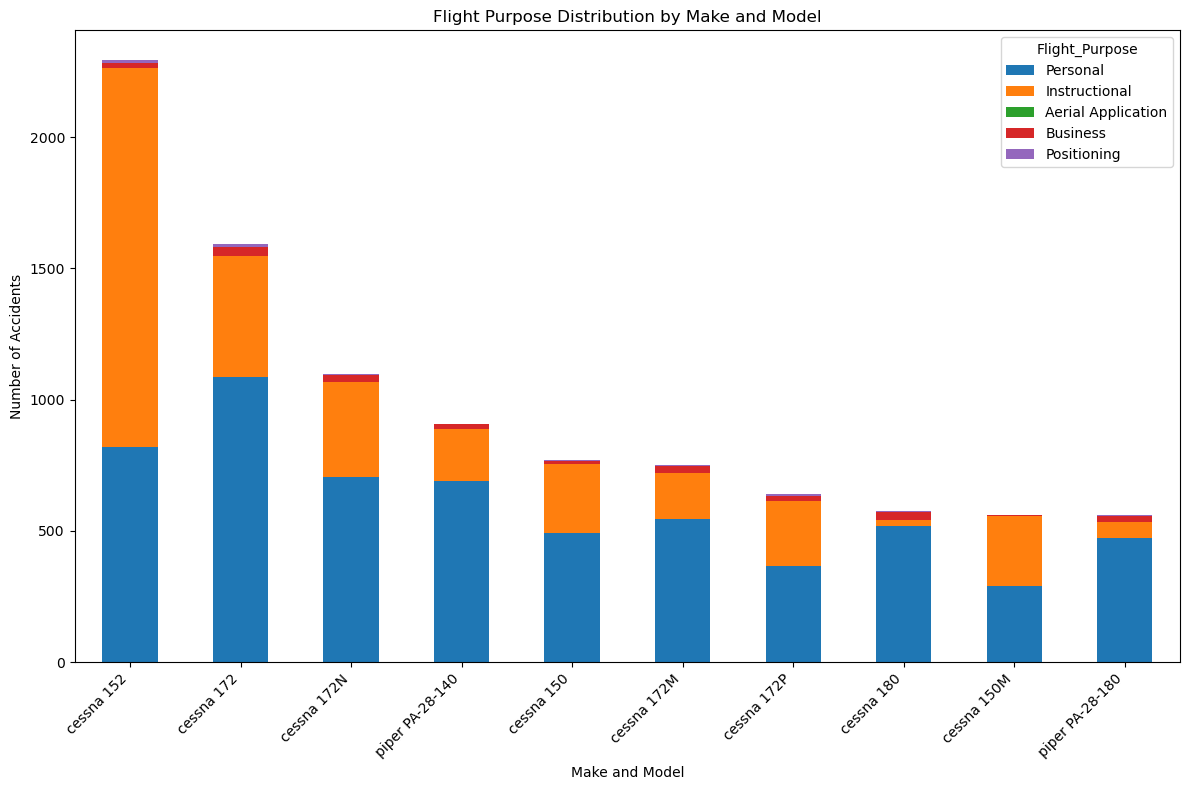

In [440]:

# Plotting ans stacking the flightpurpose categories in a bar chart
fig, ax = plt.subplots(figsize=(12, 8))

make_model_flight_pivot_top[:10].plot(kind='bar', stacked=True, ax=ax, )

ax.set_xlabel('Make and Model')
ax.set_ylabel('Number of Accidents')
ax.set_title('Flight Purpose Distribution by Make and Model')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

From the distribution, the CESSNA and PIPER that have been involved in most accidents while at for Personal and Instructional use.



Lets investigate the aircraft damage and the make and model of the planes

In [416]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75084 entries, 0 to 88886
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Investigation_Type  75084 non-null  object        
 1   Event_Date          75084 non-null  datetime64[ns]
 2   Country             74966 non-null  object        
 3   Injury_Severity     75062 non-null  object        
 4   Aircraft_damage     75084 non-null  object        
 5   Make                75084 non-null  object        
 6   Model               75084 non-null  object        
 7   Amateur.Built       75055 non-null  object        
 8   Number_of_Engines   72833 non-null  float64       
 9   Engine.Type         71874 non-null  object        
 10  Flight_Purpose      75084 non-null  object        
 11  Fatal_Injuries      65367 non-null  float64       
 12  Serious_Injuries    64338 non-null  float64       
 13  Minor_Injuries      65016 non-null  float64       


In [417]:
# check mussing values
df_new['Aircraft_damage'].isna().sum()

0

In [382]:
# drop missing values
df_new = df_new[df_new['Aircraft_damage'].notna()]

In [418]:
df_new['Aircraft_damage'].value_counts()

Aircraft_damage
Substantial    58303
Destroyed      15756
Minor           1025
Name: count, dtype: int64

Unknown is taken as missing values so i drop the rows since its less than 1% of the data in the column 

In [419]:
df_new = df_new[~df_new['Aircraft_damage'].isin(['Unknown'])]
df_new['Aircraft_damage'].value_counts()

Aircraft_damage
Substantial    58303
Destroyed      15756
Minor           1025
Name: count, dtype: int64

In [420]:
make_model_damage = df_new.groupby(['Make', 'Model', 'Aircraft_damage']).size().reset_index(name='Count')
make_model_damage.head()

,Make,Model,Aircraft_damage,Count
0,107.5 flying corporation,One Design DR 107,Destroyed,1
1,177mf llc,PITTS MODEL 12,Substantial,1
2,1977 colfer-chan,STEEN SKYBOLT,Substantial,1
3,1st ftr gp,FOCKE-WULF 190,Destroyed,1
4,2000 mccoy,Genesis,Destroyed,1


In [421]:
make_model_damage['Make_model'] = make_model_damage['Make']+ ' '+ make_model_damage['Model']
make_model_damage

,Make,Model,Aircraft_damage,Count,Make_model
0,107.5 flying corporation,One Design DR 107,Destroyed,1,107.5 flying corporation One Design DR 107
1,177mf llc,PITTS MODEL 12,Substantial,1,177mf llc PITTS MODEL 12
2,1977 colfer-chan,STEEN SKYBOLT,Substantial,1,1977 colfer-chan STEEN SKYBOLT
3,1st ftr gp,FOCKE-WULF 190,Destroyed,1,1st ftr gp FOCKE-WULF 190
4,2000 mccoy,Genesis,Destroyed,1,2000 mccoy Genesis
...,...,...,...,...,...
18130,zubair s khan,RAVEN,Substantial,1,zubair s khan RAVEN
18131,zuber thomas p,ZUBER SUPER DRIFTER,Substantial,1,zuber thomas p ZUBER SUPER DRIFTER
18132,zukowski,EAA BIPLANE,Substantial,1,zukowski EAA BIPLANE
18133,zwart,KIT FOX VIXEN,Substantial,1,zwart KIT FOX VIXEN


In [424]:
make_model_damage_pivot = make_model_damage.pivot(index='Make_model', columns='Aircraft_damage', values='Count').fillna(0)
make_model_damage_pivot

Aircraft_damage,Destroyed,Minor,Substantial
Make_model,,,
107.5 flying corporation One Design DR 107,1.0,0.0,0.0
177mf llc PITTS MODEL 12,0.0,0.0,1.0
1977 colfer-chan STEEN SKYBOLT,0.0,0.0,1.0
1st ftr gp FOCKE-WULF 190,1.0,0.0,0.0
2000 mccoy Genesis,1.0,0.0,0.0
...,...,...,...
zubair s khan RAVEN,0.0,0.0,1.0
zuber thomas p ZUBER SUPER DRIFTER,0.0,0.0,1.0
zukowski EAA BIPLANE,0.0,0.0,1.0


In [427]:
# create total column to be able to sort values
make_model_damage_pivot['Total'] = make_model_damage_pivot.sum(axis=1)
make_model_damage_pivot = make_model_damage_pivot.sort_values(by='Total', ascending=False).drop(columns='Total')
make_model_damage_pivot

Aircraft_damage,Destroyed,Minor,Substantial
Make_model,,,
cessna 152,352.0,28.0,1935.0
cessna 172,178.0,8.0,1440.0
cessna 172N,225.0,7.0,893.0
piper PA-28-140,218.0,5.0,694.0
cessna 150,123.0,9.0,653.0
...,...,...,...
fly by sea co COMP AIR 1,0.0,0.0,1.0
fly hard trike inc SKYCYCLE STING RAY,0.0,0.0,1.0
flying k enterprises Sky Raider,0.0,0.0,1.0


In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

make_model_damage_pivot[:10].plot(kind='bar',stacked=True, ax=ax)
ax.set_title('Aircraft Damage Distribution by Make and Model')
ax.set_xlabel('Make and Model')
ax.set_ylabel('Numbr of Accidents')
plt.xticks(rotation=45, ha='right');

The Cessna suffered substantial damage more.

Now Lets look at the most reliable models and make